# Welcome to the Flor Tutorial!

This tutorial consists of three parts, each of which builds on the previous.

- This first notebook shows how easy is to use Flor for lightweight versioning and tracking of ML/AI experiments. 
- Our second notebook will show us how Flor aids with collaboration, by reusing an existing Flor pipeline and integrating into a new task
- Our final notebook shows how you can get more benefit from Flor with additional effort to wrap your code into more detailed Flor pipelines.



# Part 1: Annotating and Versioning

A well-annotated experiment is easier to find and interpret, and a versioned experiment is easier to share and reproduce. In this part, we're going to show you how Flor can help systematize the annotating and versioning of alternatives you try in the process of training models.

## Prepare your environment before starting the activities.

We're going to start by importing Flor and letting it know the name of our notebook.

In [2]:
# Import Flor
import flor

# If the notebook name has not already been set, you are able to set the name in code. 
flor.setNotebookName('tutorial_1.ipynb')

## Sentiment Analysis

First, we'll go through a short exercise to illustrate a common interactive model-training pattern. We're going to train a model to predict the sentiment -- positive, or negative -- of English phrases. The model-training pipeline is fairly standard: we load a dataset, do some light preprocessing, do a train/test split, train the model, and then validate. We're going to try two different alternatives.

#### Experiment 1: Random Forest Classifier with 5 estimators.

In [3]:
# Import standard libraries
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load the Data
movie_reviews = pd.read_json('data.json')

# Do light preprocessing
movie_reviews['rating'] = movie_reviews['rating'].map(lambda x: 0 if x < 5 else 1)

# Do train/test split
X_tr, X_te, y_tr, y_te = train_test_split(movie_reviews['text'], movie_reviews['rating'], 
                                          test_size=0.20, random_state=92)

# Vectorize the English sentences
vectorizer = TfidfVectorizer()
vectorizer.fit(X_tr)
X_tr = vectorizer.transform(X_tr)
X_te = vectorizer.transform(X_te)

# Fit the model              ##############
clf = RandomForestClassifier(n_estimators=5).fit(X_tr, y_tr)
                             ##############
y_pred = clf.predict(X_te)

# Validate the predictions
c = classification_report(y_te, y_pred)

print(c)

             precision    recall  f1-score   support

          0       0.70      0.69      0.70      5024
          1       0.69      0.70      0.70      4976

avg / total       0.70      0.70      0.70     10000



We see a report above. The precision and recall are hovering around 70%. From reading the code block, we also noticed that the _random forest classifier_ was trained on just **5 estimators**, let's see what happens if we **increase the number of estimators to 7**.

#### Experiment 2: Random Forest Classifier with 7 estimators.

In [4]:
# Fit a new model            ###############
clf2 = RandomForestClassifier(n_estimators=7).fit(X_tr, y_tr)
                             ###############
y_pred = clf2.predict(X_te)

# Validate the predictions
c = classification_report(y_te, y_pred)

print(c)

             precision    recall  f1-score   support

          0       0.75      0.74      0.74      5024
          1       0.74      0.75      0.74      4976

avg / total       0.74      0.74      0.74     10000



We see a minor improvement.

### Examples of good design patterns

In our example above, we did a few things well. 

First, when switching from `n_estimators=5` to `n_estimators=7`, *we did not overwrite our original Jupyter cell to change the parameter!* Instead, we created a new cell in our notebook representing the history of our experimental process. We have kept a proper "scientific notebook" of all our experiments. This is important for rigorous work that enables experimental reproducibility, bias elimination, and mutual interpretation of results across team members and time. For example, anyone who views this notebook will know what data, modeling techniques and parameters we tried, and how they may have affected our choice of the final model (and the decision it eventually makes!) 

Second, we used *inline documentation* and *code comments* to highlight a number of key features of our model training "pipeline". In the Jupyter cell for our first experiment run, we were careful to hand-annotate a number of important issues:
1. The difference between the two cells; namely, switching from `n_estimators=5` to `n_estimators=7`
2. A high level overview of the steps in our experiment.

Considered together, these good design patterns amount to (1) versioning, and (2) experiment annotation: there is a reproducible record of the different model configurations tried by the data scientist, and provided we read some code and documentation, we can tell how the versions differ.

### Reducing the reliance on "best practices"

We should feel good about our experimental practices above. But we should also be concerned  that these practices relied upon our disciplined behavior at every step of experimentation. In practice, as we run many, many more experiments, and as our code evolves from short scripts to long and complex "pipelines", it will become burdensome to enforce this discipline. And in practice, things get messy.

As you may have experienced yourself, it's distracting (and no fun!) to focus on these kinds of disciplinary details, rather than the interesting and important work of modeling and tuning that goes on in experimental AI and Machine Learning. 

Our goal with Flor is to ease this burden -- to let users focus on the interesting aspects of their work, while also automatically (and hence reliably!) capturing contextual information about our experiments that enables post-hoc interpretability and reproducibility.

## Sentiment Analysis in Flor

To reduce user burden and maintain good experimental discipline, Flor automatically versions and annotates experiment executions (among other features!). In this next section, we start by showing how to wrap our previous example in Flor with just 3 lines of code, to get the benefits of automatic versioning and experiment annotation.

### BEGIN FLOR EXPERIMENT

In the cell below, we've copied the model-training pipeline labeled **Experiment 1: Random Forest Classifier with 5 estimators**.

In order to get Flor to help us, we only need 2 simple changes to our code:
1. We nest the code within a decorated Python function
2. We return the value(s) that we want Flor to track

We highlight the differences in-line using `###`.

             precision    recall  f1-score   support

          0       0.71      0.70      0.71      5024
          1       0.70      0.71      0.71      4976

avg / total       0.71      0.71      0.71     10000



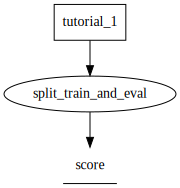

In [6]:
###################################
@flor.track_action('risecamp_demo')
def split_train_and_eval(**kwargs):
###################################
    import pandas as pd

    from sklearn.feature_extraction.text import TfidfVectorizer
    from sklearn.model_selection import train_test_split
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import classification_report
    movie_reviews = pd.read_json('data.json')
    movie_reviews['rating'] = movie_reviews['rating'].map(lambda x: 0 if x < 5 else 1)

    X_tr, X_te, y_tr, y_te = train_test_split(movie_reviews['text'], movie_reviews['rating'], 
                                              test_size=0.20, random_state=92)

    vectorizer = TfidfVectorizer()
    vectorizer.fit(X_tr)
    X_tr = vectorizer.transform(X_tr)
    X_te = vectorizer.transform(X_te)
    clf = RandomForestClassifier(n_estimators=5).fit(X_tr, y_tr)
    
    y_pred = clf.predict(X_te)

    score = clf.score(X_te, y_te)
    c = classification_report(y_te, y_pred)

    print(c)
    
    #######################
    return {'score': score}
    #######################

# This is how we run the pipeline
split_train_and_eval()

As before, and as expected, we see that the score is hovering around 70%. Underneath the score table, we can see the *Flor Plan* of our `risecamp_demo` experiment. We read it as follows: the function `split_train_and_eval` defined in the tutorial artifact (`tutorial_1.ipynb`) is run to produce a `score`. Despite its simplicity and coarse granularity, Flor associated the score of the model with the execution of the experiment, and versioned the notebook as it was when the cell ran, giving us some level of reproducibility -- even if the cell were overwritten in the future. 

Next, let's take a look at what Flor has captured so far from our experiment execution:

In [7]:
flor.Experiment('risecamp_demo').summarize()

,label,score,tutorial_1
0,2018-10-12_00-38-58,0.7089,tutorial_1_139742745119600.ipynb
1,2018-10-12_00-37-29,0.7044,tutorial_1_139741553533616.ipynb


Here, the `label` is just the execution timestamp. The values in the columns `score` and `tutorial_1` are complementary information to the Flor Plan diagram. The filename in the cell of `tutorial_1` serves as confirmation that our Jupyter notebook was automatically versioned, and all of the relevant artifacts (the code) and hyperparameters (the score) were associated with the execution `label`. 

***Important instructions*** Now, you will jump to **BEGIN FLOR EXPERIMENT** (scroll up), and modify the cell underneath that label. Change the number of estimators from 5 to 7 (Line 21) and re-run the cells.

Here, you should see that Flor can automate away the responsibility of versioning experiments on every execution, and maintain some level of reproducibility in the face of (otherwise) destructive changes.

## Finer granularity tracking in Flor

So far, we've seen how to wrap a model-training pipeline in Flor with just 3 lines of code. This coarse-grained wrapping helped us automatically version the code we used to train the model. Next, we're going to show you how to do a hyper-parameter sweep (where we re-run the pipeline once for every possible configuration), and at the same time demonstrate how exposing the hyper-parameters of the model to Flor helps us capture more meta-data -- automating away some of the responsibility of annotating changes between versions. As before, the changes are minimal, and highlighted in `###`.

             precision    recall  f1-score   support

          0       0.73      0.74      0.74      5024
          1       0.73      0.73      0.73      4976

avg / total       0.73      0.73      0.73     10000

             precision    recall  f1-score   support

          0       0.72      0.66      0.69      5024
          1       0.68      0.74      0.71      4976

avg / total       0.70      0.70      0.70     10000



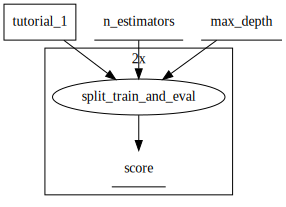

In [8]:
@flor.track_action('risecamp_demo')
                         ############  #########
def split_train_and_eval(n_estimators, max_depth, **kwargs):
                         ############  #########
    import pandas as pd

    from sklearn.feature_extraction.text import TfidfVectorizer
    from sklearn.model_selection import train_test_split
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import classification_report
    movie_reviews = pd.read_json('data.json')
    movie_reviews['rating'] = movie_reviews['rating'].map(lambda x: 0 if x < 5 else 1)

    X_tr, X_te, y_tr, y_te = train_test_split(movie_reviews['text'], movie_reviews['rating'], 
                                              test_size=0.20, random_state=92)

    vectorizer = TfidfVectorizer()
    vectorizer.fit(X_tr)
    X_tr = vectorizer.transform(X_tr)
    X_te = vectorizer.transform(X_te)         ############            #########
    clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth).fit(X_tr, y_tr)
                                              ############            #########
    y_pred = clf.predict(X_te)

    score = clf.score(X_te, y_te)
    c = classification_report(y_te, y_pred)

    print(c)
    
    return {'score': score}
    
# This is how we run the pipeline
split_train_and_eval(n_estimators=7, max_depth=[10, 100])

You will notice two classification reports print when you run the cell above. This is evidence that the model-training pipeline ran twice: once per value in `max_depth`: `max_depth=10` and `max_depth=100`. Flor runs the experiment once per legal configuration of the hyper-parameters, and visually represents the number of executions of a subgraph in the Flor Plan by a rectangle with `Nx` at its top-center, where `N` is the number of executions. Here, we see that `split_train_and_eval` ran `2x`. 

Now, let's summarize the experiment to see what we've done so far.

In [9]:
flor.Experiment('risecamp_demo').summarize()

,label,score,max_depth,n_estimators,tutorial_1
0,2018-10-12_00-42-25,0.7331,100.0,7.0,tutorial_1_139742951853808.ipynb
1,2018-10-12_00-42-25,0.7002,10.0,7.0,tutorial_1_139742951853808.ipynb
2,2018-10-12_00-38-58,0.7089,NaN,NaN,tutorial_1_139742745119600.ipynb
3,2018-10-12_00-37-29,0.7044,NaN,NaN,tutorial_1_139741553533616.ipynb


We should see a table with 4 rows. The table has several cells with value `NaN` because we've introduced new hyper-parameters later in the exploration that were not available in previous versions of the experiment.

**The upshot:** With a little more effort to expose hyperparameters to Flor, we were able to automate our previously manual changes (the setting of `n_estimators`) while capturing the metadata corresponding to each parameter setting tested. We can use this information to interpret an experiment version, and to tell how two experiment versions differ. 

## Summary of Part 1
To summarize, we saw how Flor allows us to easily wrap Python-based ML code in order to track its versions, its inputs/outputs, and its usage across experimental runs. Now it's time to move on to a less isolated example and explore Flor in more detail.

## Thank you! You may now move on to `tutorial_2.ipynb`